In [135]:
import pandas as pd
import os
from os.path import isfile, join
from datetime import datetime
import matplotlib.pyplot as plt

In [194]:
covid_folder = '../csse_covid_19_data/csse_covid_19_daily_reports/'
covid_files = [os.path.join(covid_folder,f) for f in os.listdir(covid_folder) if isfile(join(covid_folder, f)) and f.endswith('.csv')]

In [195]:
all_data =[]
for file in covid_files:
    df= pd.read_csv(file)
    df.head()
    head, tail = os.path.split(file)
    date=datetime.strptime(tail[0:-4], '%m-%d-%Y')
    df['Date']=date
    df=df.rename(columns={'Country/Region':'Country'})
    col_to_remove=set(df.columns).intersection(['Last Update', 'Latitude', 'Longitude'])
    df=df.drop(columns=col_to_remove)
    all_data.append(df)
all_df = pd.concat(all_data, sort=False).sort_values(by='Date', ascending=True)

In [196]:
country_aggregated=all_df.groupby(by=['Date', 'Country']).agg('sum')
country_aggregated.sort_values(by=['Date', 'Deaths'] , ascending=[False, False], inplace=True)
country_aggregated.reset_index(inplace=True)
country_aggregated.head()

,Date,Country,Confirmed,Deaths,Recovered
0,2020-03-15,China,81003.0,3203.0,67017.0
1,2020-03-15,Italy,24747.0,1809.0,2335.0
2,2020-03-15,Iran,13938.0,724.0,4590.0
3,2020-03-15,Spain,7798.0,289.0,517.0
4,2020-03-15,France,4513.0,91.0,12.0


In [ ]:
def get_country_timeseries(df, country):
    result = df[(df['Country']==country) & (df['Date']<='2020-03-10')]
    result.sort_values(by=['Date'], ascending= True , inplace=True)
    result['Death_per_day']= result['Deaths'].diff()
    result['Death_per_day']= result['Death_per_day'].rolling(3,center=True).mean()
    return result

In [ ]:
us = get_country_timeseries(country_aggregated, 'US')
italy = get_country_timeseries(country_aggregated, 'Italy')
china = get_country_timeseries(country_aggregated, 'Mainland China')
iran= get_country_timeseries(country_aggregated, 'Iran')

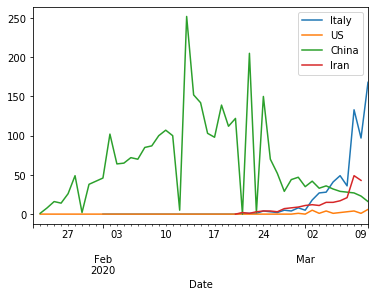

In [231]:
plt.figure()
ax = plt.gca()
line =italy.plot(x='Date', y='Death_per_day', ax=ax, label='Italy')
ax.legend()
us.plot(x='Date', y='Death_per_day', ax=ax, label='US')
china.plot(x='Date', y='Death_per_day', ax=ax, label='China')
iran.plot(x='Date', y='Death_per_day', ax=ax, label='Iran')
